#Logistic Regression Class




In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        """Cross-entropy loss function"""
        n_samples = len(y)
        loss = -(1/n_samples) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss


    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Compute loss for monitoring
            if _ % 100 == 0:
                loss = self.compute_loss(y, y_pred)
                print(f"Iteration {_}: Loss = {loss:.2f}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return np.where(y_pred >= 0.5, 1, 0)  # Convert probabilities to class labels (0 or 1)


#How to Train data

Iteration 0: Loss = 0.69
Iteration 100: Loss = 0.50
Iteration 200: Loss = 0.40
Iteration 300: Loss = 0.34
Iteration 400: Loss = 0.30
Iteration 500: Loss = 0.28
Iteration 600: Loss = 0.26
Iteration 700: Loss = 0.24
Iteration 800: Loss = 0.23
Iteration 900: Loss = 0.22
Accuracy: 0.95


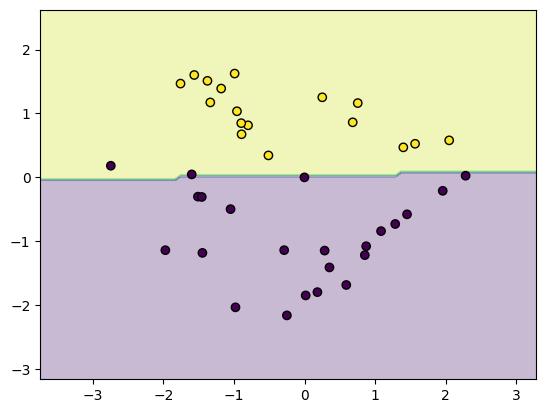

In [20]:
# Generate synthetic binary classification data
X, y = make_classification(n_samples=200, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2, random_state=13)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Train Logistic Regression Model
model = LogisticRegression(lr=0.01, n_iters=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = np.sum(y_pred == y_test)/len(y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.show()

plot_decision_boundary(model, X_test, y_test)